In [4]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 991.0 kB/s eta 0:01:41
   ---------------------------------------- 0.2/99.7 MB 2.1 MB/s eta 0:00:48
   ---------------------------------------- 0.4/99.7 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.7/99.7 MB 4.0 MB/s eta 0:00:25
   ---------------------------------------- 1.2/99.7 MB 5.4 MB/s eta 0:00:19
    --------------------------------------- 1.7/99.7 MB 6.5 MB/s eta 0:00:16
    --------------------------------------- 1.7/99.7 MB 6.2 MB/s eta 0:00:16
    --------------------------------------- 2.3/99.7 MB 6.4 MB/s eta 0:00:16
   - -------------------------------------- 3.2/99.7 MB 7.7 MB/s eta 0:00:13
   - -------------------------

In [6]:
pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     -------- ------------------------------ 61.4/282.6 kB 1.1 MB/s eta 0:00:01
     ----------------------- -------------- 174.1/282.6 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
#Data Handling
import numpy as np 
import pandas as pd 

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
import graphviz

#Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Modelsl
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#Evalutaion
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 112.2+ KB


In [13]:
# --- Fixing Data Types ---
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[lst] = df[lst].astype(object)

In [14]:
df.shape

(1025, 14)

In [15]:
#Exploratory Data Analysis 

In [17]:
#Categorical Data Visulization 
#Sex (GENDER)


 Sex (Gender) Total 



sex
1    713
0    312
Name: count, dtype: int64

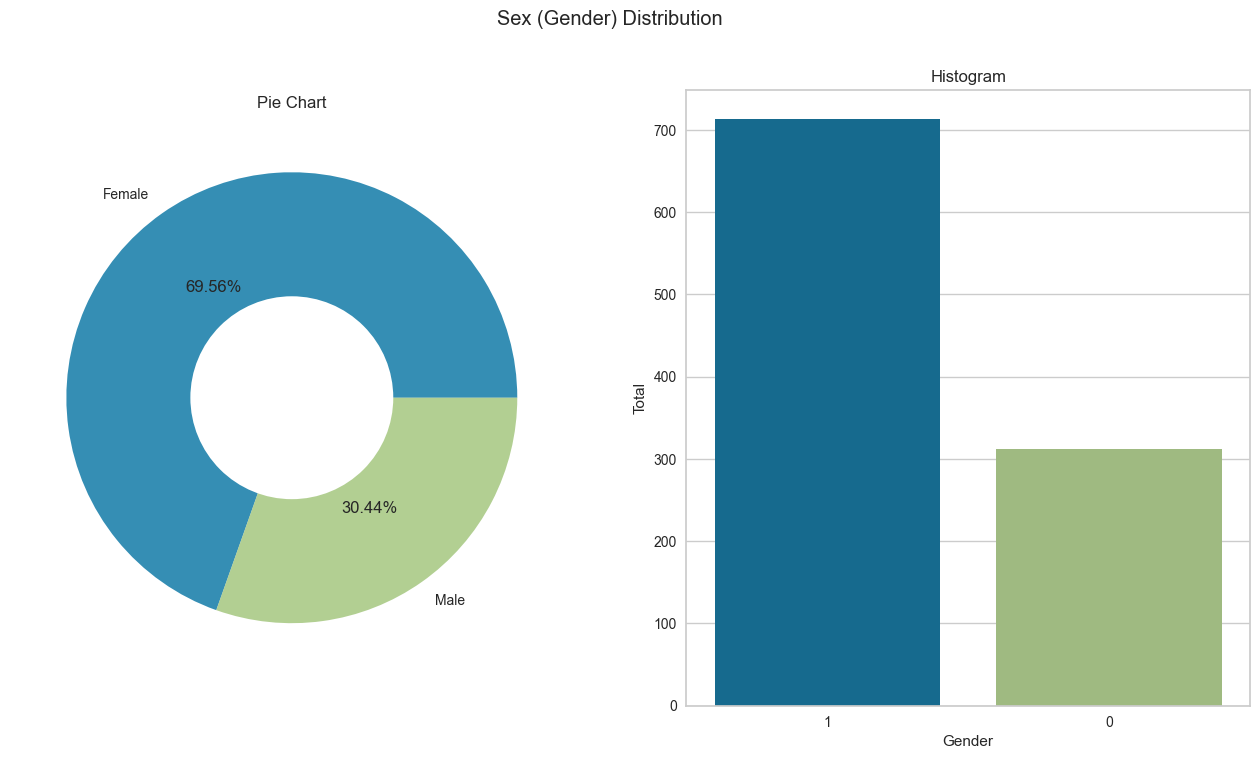

In [18]:
labels=['Female', 'Male']
order=df['sex'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Sex (Gender) Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['sex'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='sex',data=df,order=order)
plt.xlabel('Gender')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Sex (Gender) Total \n')
df.sex.value_counts(dropna=False)
# print()

In [20]:
#cp (Chest Pain Type) 


 Chest Pain Type Total 



sex
1    713
0    312
Name: count, dtype: int64

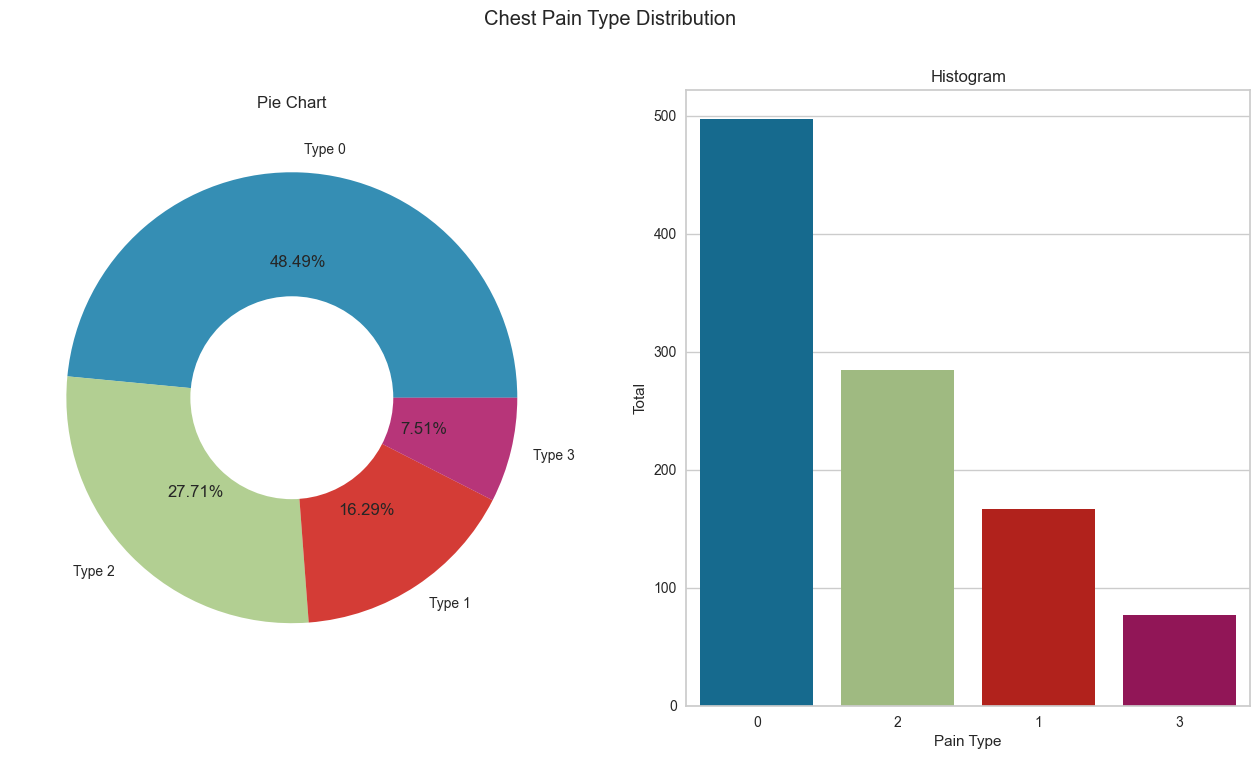

In [21]:
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=df['cp'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Chest Pain Type Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['cp'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='cp',data=df,order=order)
plt.xlabel('Pain Type')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Chest Pain Type Total \n')
df.sex.value_counts(dropna=False)
# print()


 Fasting BLood Sugar Total 



sex
1    713
0    312
Name: count, dtype: int64

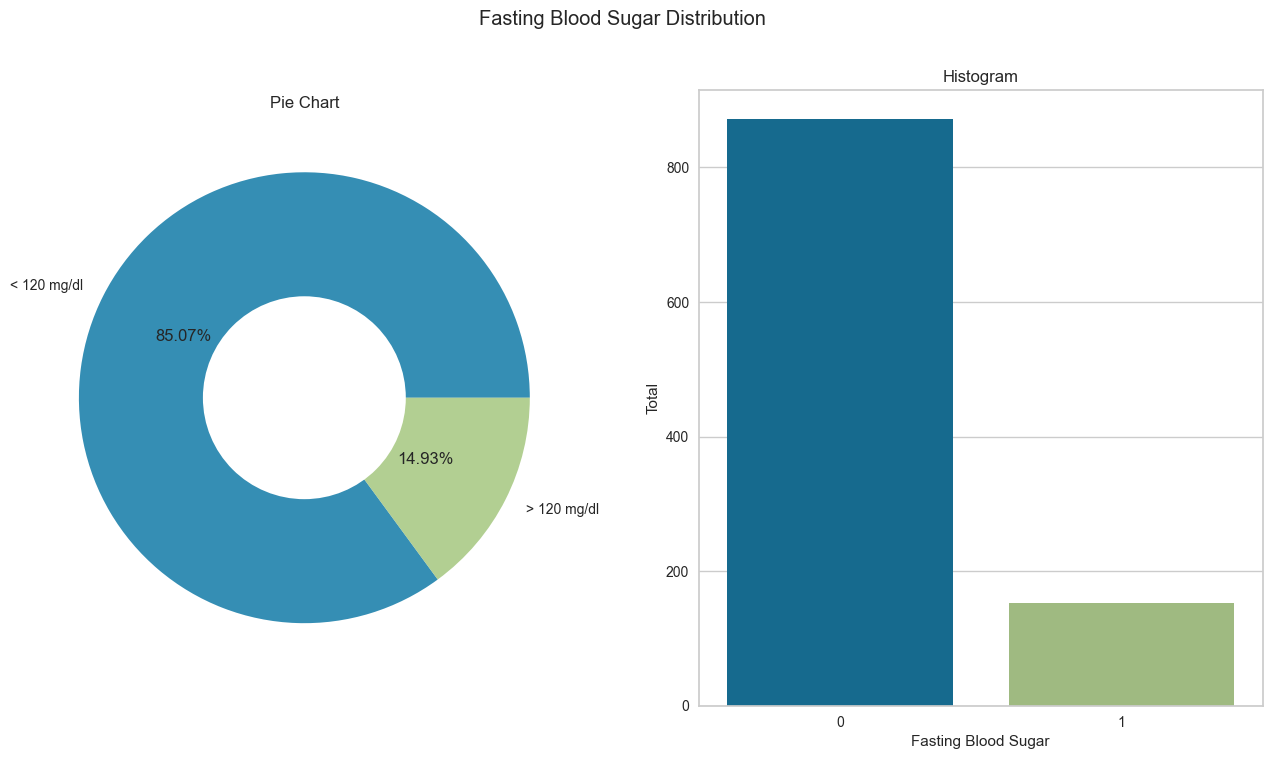

In [22]:
#fbs (Fasting Blood Sugar) 
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df['fbs'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Fasting Blood Sugar Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['fbs'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='fbs',data=df,order=order)
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Fasting BLood Sugar Total \n')
df.sex.value_counts(dropna=False)
# print()


 Resting Electrocardiographic Results Total 



sex
1    713
0    312
Name: count, dtype: int64

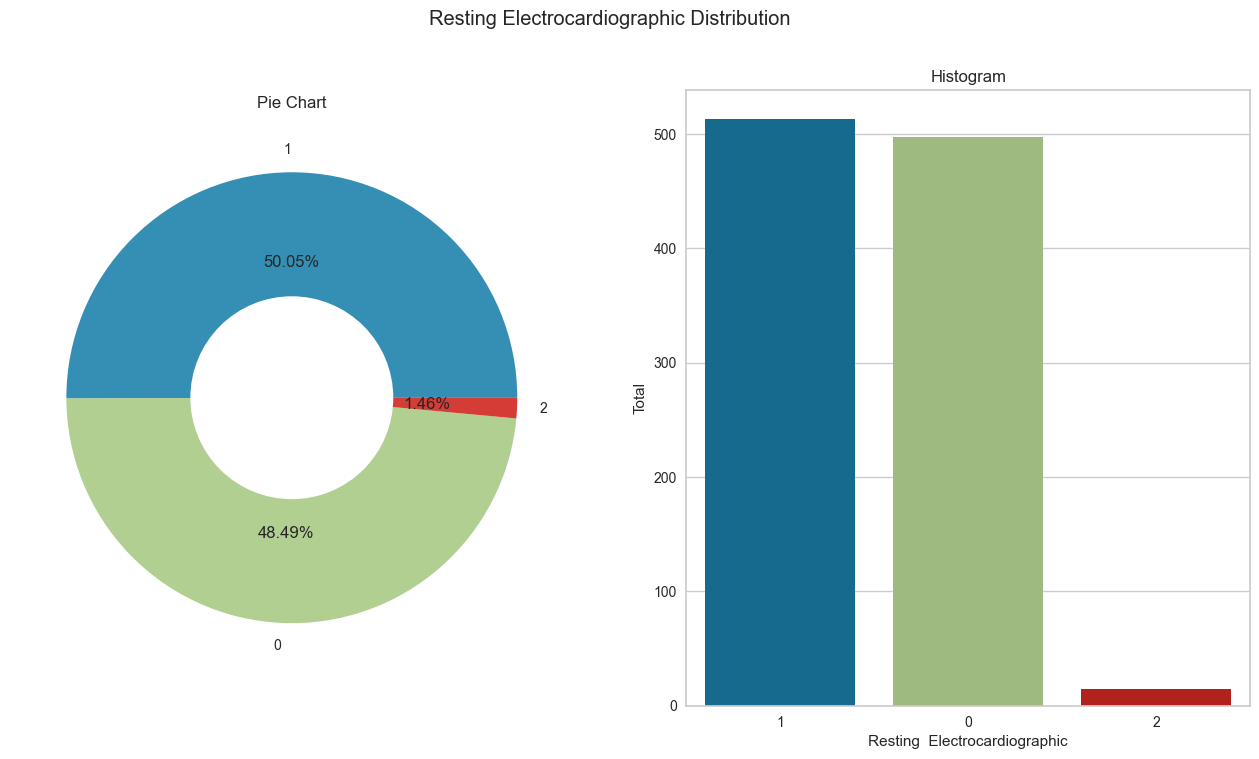

In [23]:
#restecg (Resting Electrocardiographic Results) 
labels=['1', '0', '2']
order=df['restecg'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Resting Electrocardiographic Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['restecg'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='restecg',data=df,order=order)
plt.xlabel('Resting  Electrocardiographic')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Resting Electrocardiographic Results Total \n')
df.sex.value_counts(dropna=False)
# print()


 Exercise Induced Angina Total 



sex
1    713
0    312
Name: count, dtype: int64

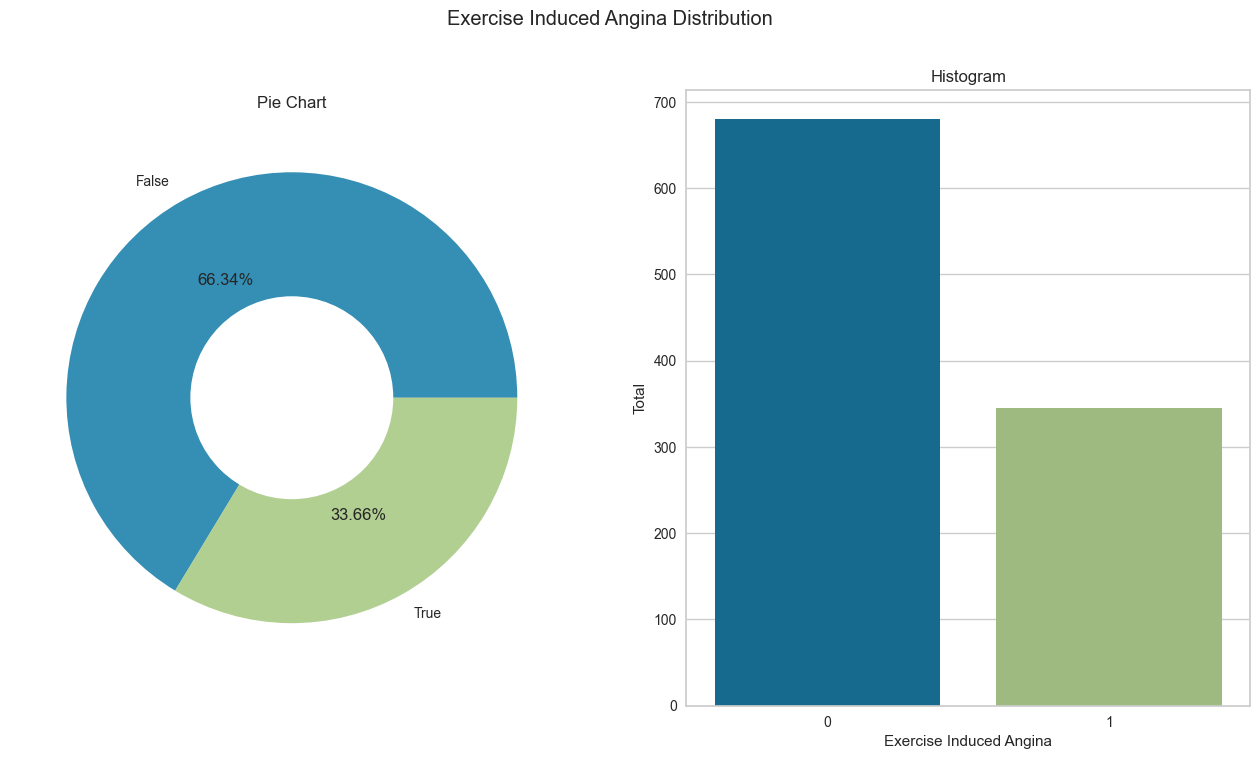

In [24]:
#exang (Exercise Induced Angina) 
labels=['False', 'True']
order=df['exang'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Exercise Induced Angina Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['exang'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='exang',data=df,order=order)
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Exercise Induced Angina Total \n')
df.sex.value_counts(dropna=False)
# print()


 Slope Total 



sex
1    713
0    312
Name: count, dtype: int64

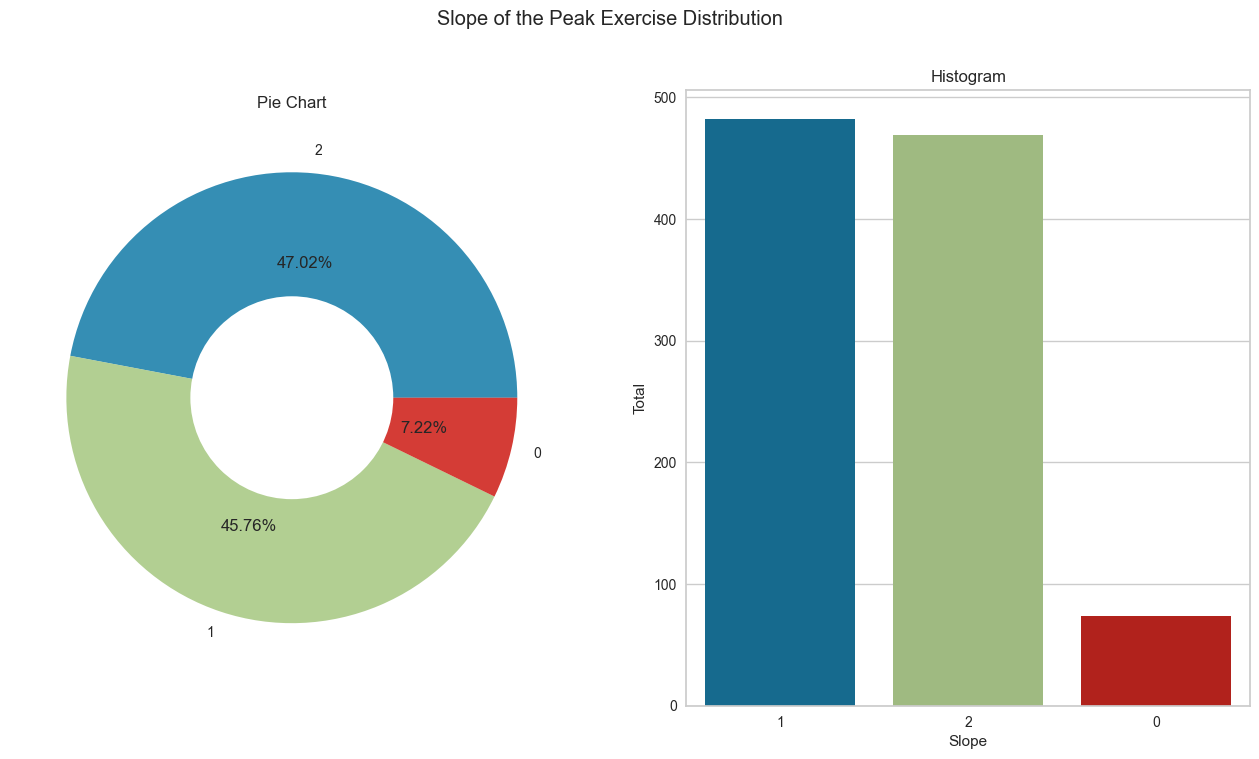

In [25]:
#slope (Slope of the Peak Exercise) 
labels=['2', '1', '0']
order=df['slope'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Slope of the Peak Exercise Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['slope'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='slope',data=df,order=order)
plt.xlabel('Slope')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Slope Total \n')
df.sex.value_counts(dropna=False)
# print()


 Number of Major Vessels Total  



sex
1    713
0    312
Name: count, dtype: int64

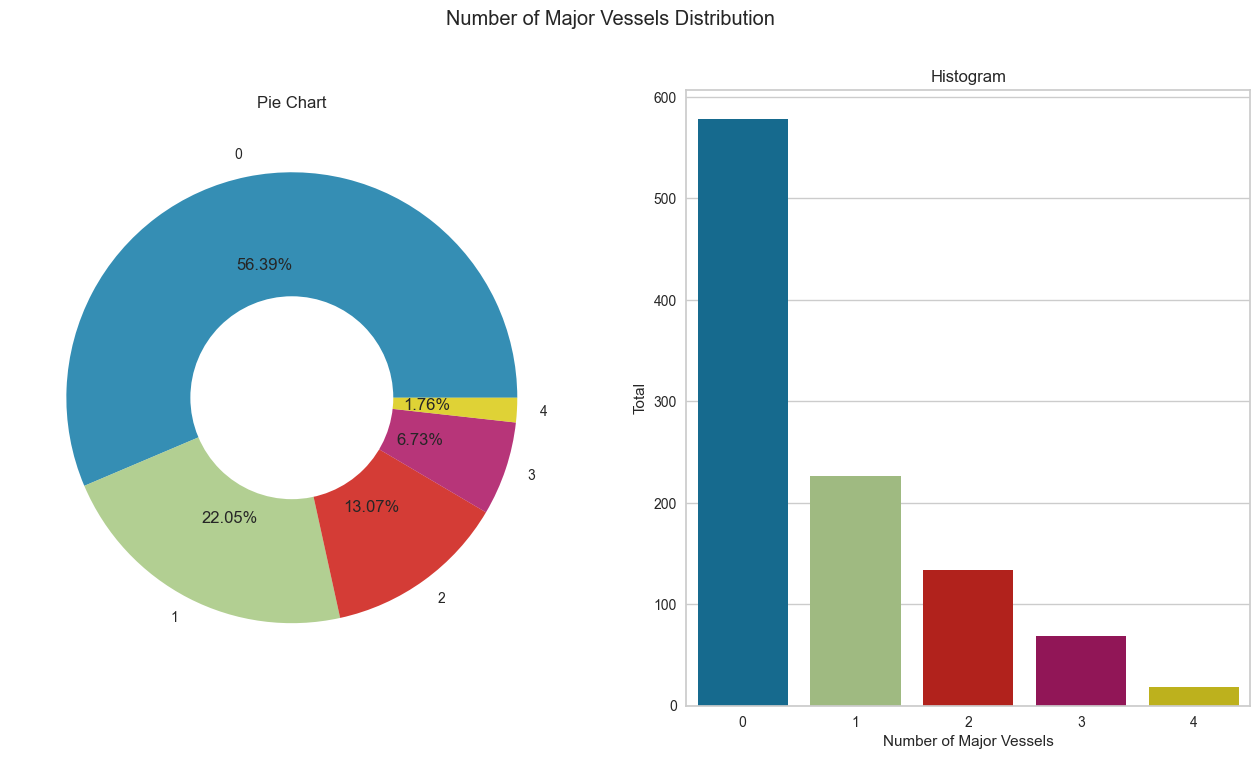

In [26]:
#ca (Number of Major Vessels) 
labels=['0', '1', '2', '3', '4']
order=df['ca'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Number of Major Vessels Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['ca'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='ca',data=df,order=order)
plt.xlabel('Number of Major Vessels')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Number of Major Vessels Total  \n')
df.sex.value_counts(dropna=False)
# print()


 "thal" Total  



sex
1    713
0    312
Name: count, dtype: int64

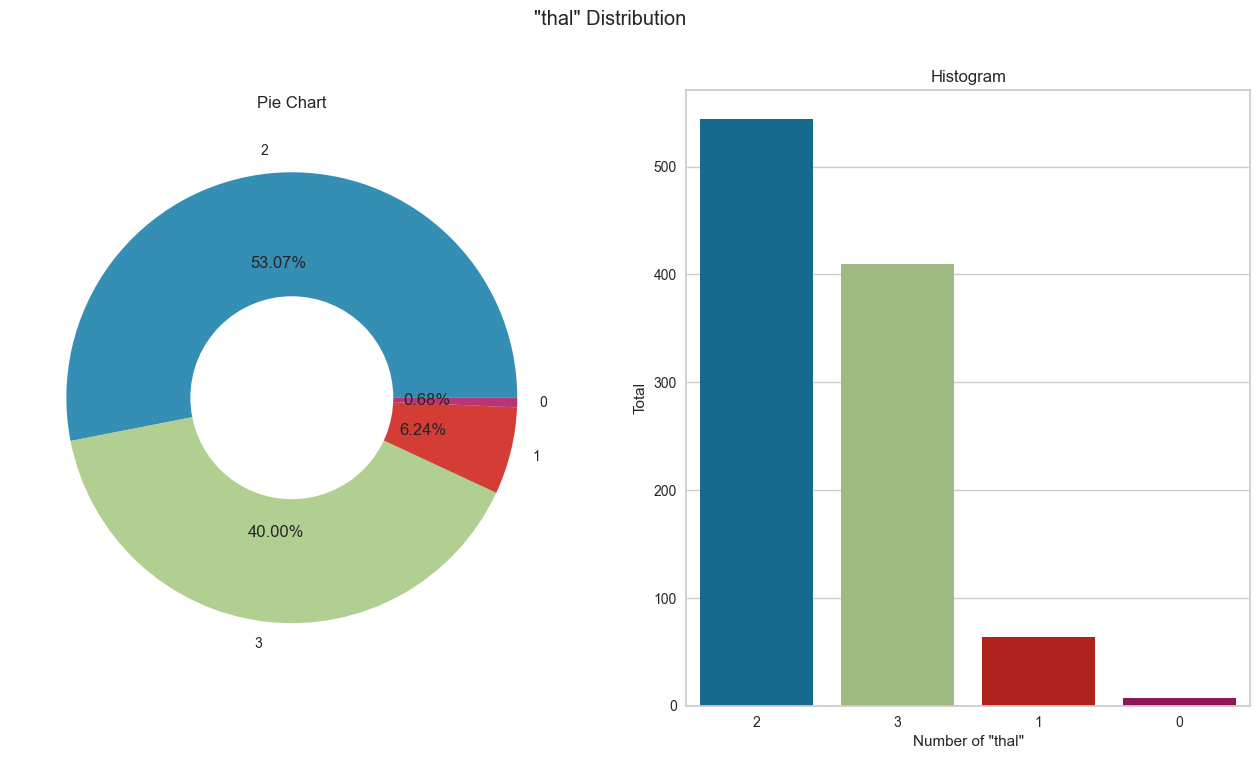

In [27]:
#thal 
labels=['2', '3', '1', '0']
order=df['thal'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('"thal" Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['thal'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='thal',data=df,order=order)
plt.xlabel('Number of "thal"')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n "thal" Total  \n')
df.sex.value_counts(dropna=False)
# print()


 Heart Diseases Status (target) Total 



sex
1    713
0    312
Name: count, dtype: int64

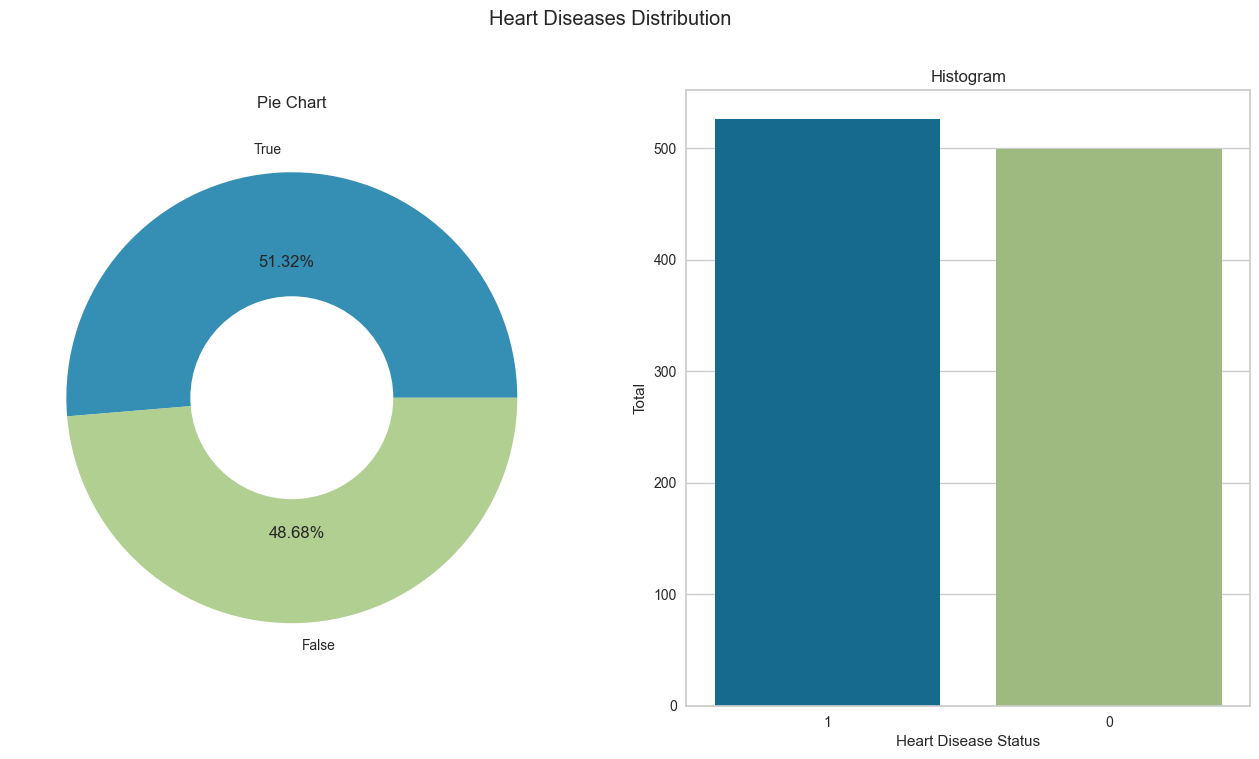

In [28]:
#target (Heart Diseases Status) 
labels=['True', 'False']
order=df['target'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Heart Diseases Distribution')

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Pie Chart')
plt.pie(df['target'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Histogram')
ax= sns.countplot(x='target',data=df,order=order)
plt.xlabel('Heart Disease Status')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Heart Diseases Status (target) Total \n')
df.sex.value_counts(dropna=False)
# print()

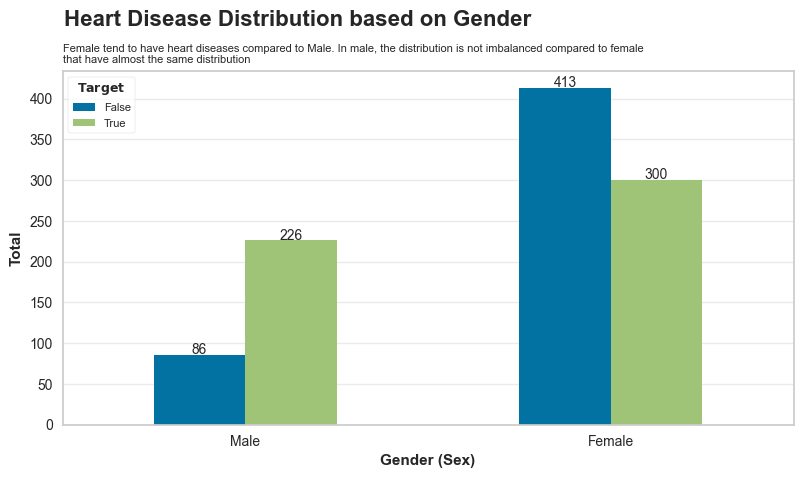

In [29]:
#Heart Disease Distribution Based on Gender
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']


# --- Creating Bar Chart ---
ax = pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(8, 5))


# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.title('Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution', 
          fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

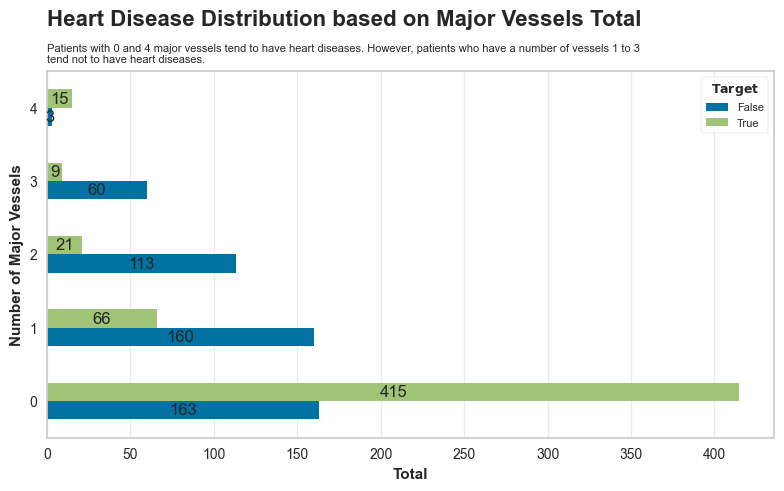

In [30]:
#Heart Disease Distribution Based on Major Vessels Total 
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(df.ca, df.target).plot(kind='barh', figsize=(8, 5))

# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold')

plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

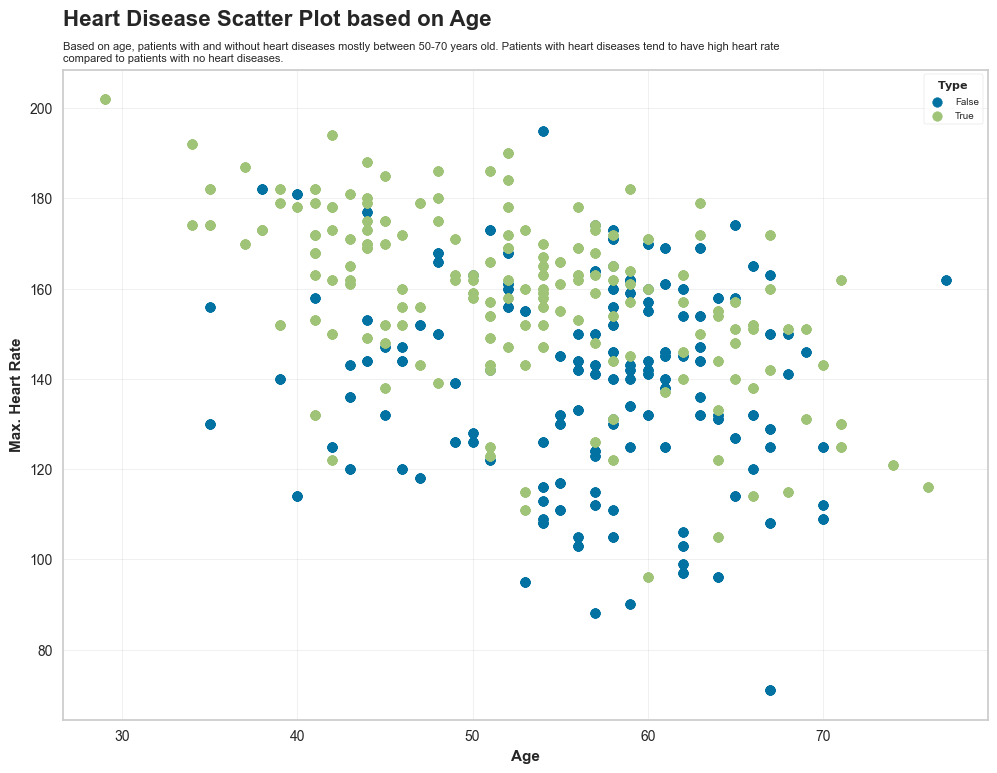

In [31]:
#Heart Disease Scatter Plot Based on Age 
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)

plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif')

plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif')

plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

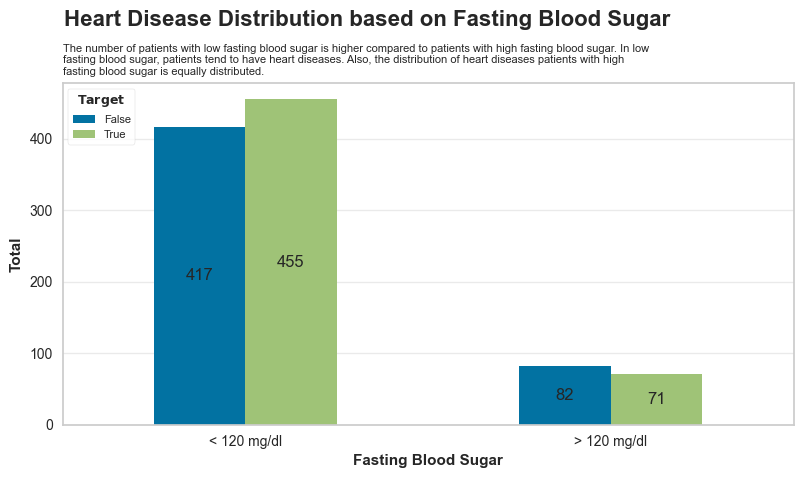

In [32]:
#Heart Disease Distribution Based on Fasting Blood Sugar 
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['< 120 mg/dl', '> 120 mg/dl']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(8, 5))

# --- Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(height), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Fasting Blood Sugar', 
             fontweight='heavy', x=0.065, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')

plt.title('The number of patients with low fasting blood sugar is higher compared to patients with high fasting blood sugar. In low\nfasting blood sugar, patients tend to have heart diseases. Also, the distribution of heart diseases patients with high\nfasting blood sugar is equally distributed.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])

plt.xlabel('Fasting Blood Sugar', fontfamily='sans-serif', fontweight='bold')

plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')

plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

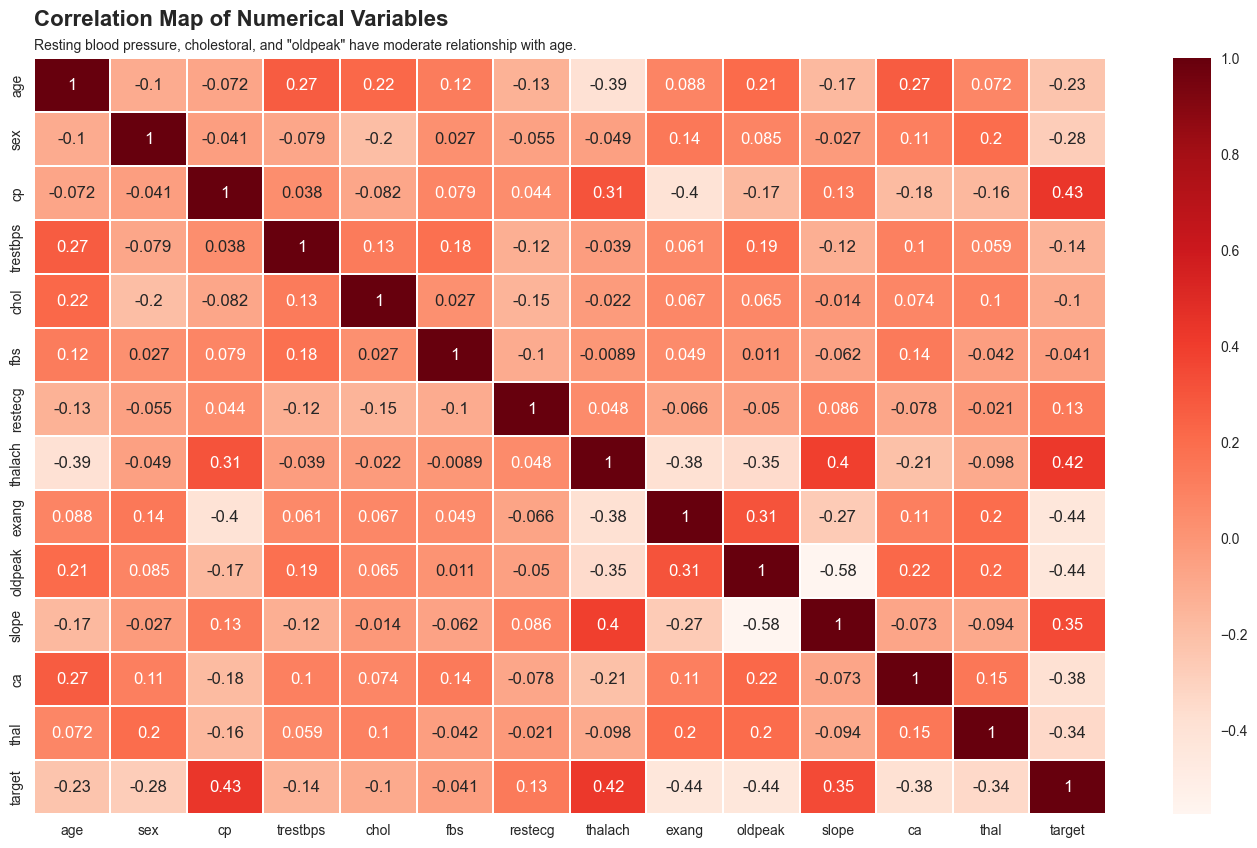

In [33]:
#Heatmap 
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))

sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)

plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

In [34]:
# Data Preprocessing 
#One-Hot Encoding 
# categorical columns
cp = pd.get_dummies(df['cp'],prefix= 'cp')
thal = pd.get_dummies(df['thal'],prefix = 'thal')
slope = pd.get_dummies(df['slope'],prefix = 'slope')

#merge dummy variables to main data frame
frames = [ df,cp,thal,slope]
df = pd.concat(frames,axis=1)

#Dropping the unnecessory variables
df=df.drop(columns = ['cp','thal','slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,False,False,False,False,False,False,True,False,False,True
1,53,1,140,203,1,0,155,1,3.1,0,...,False,False,False,False,False,False,True,True,False,False
2,70,1,145,174,0,1,125,1,2.6,0,...,False,False,False,False,False,False,True,True,False,False
3,61,1,148,203,0,1,161,0,0.0,1,...,False,False,False,False,False,False,True,False,False,True
4,62,0,138,294,1,1,106,0,1.9,3,...,False,False,False,False,False,True,False,False,True,False


In [35]:
#Missing values
df.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
target      0
cp_0        0
cp_1        0
cp_2        0
cp_3        0
thal_0      0
thal_1      0
thal_2      0
thal_3      0
slope_0     0
slope_1     0
slope_2     0
dtype: int64

In [36]:
#Separating Target Variable 
#Declaring Dependent and Independent variables
X = df.drop(['target'],axis=1)
y = df['target']

In [38]:
#Data Normalization 
X = MinMaxScaler().fit_transform(X)

In [40]:
#Splitting Training and Testing Dataset 
#Splitting x and y into training and testing datasets

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=4)

In [41]:
#checking the shape of X_train and X_test
X_train.shape, X_test.shape

((820, 21), (205, 21))

In [42]:
#Model Training
#Support Vector Machine (SVM)


In [43]:
SVMmodel = SVC()

# Train Support Vector Machine(SVM)
SVMmodel.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVMmodel.predict(X_test)

SVMA= accuracy_score(y_test, y_pred)

print("Support Vector Machine Model Accuracy:", SVMA)

Support Vector Machine Model Accuracy: 0.8780487804878049


In [45]:
pip install DTmodel

  Obtaining dependency information for DTmodel from https://files.pythonhosted.org/packages/c0/15/f313d79af9dfd163bb090fdf50be7392160680d0f20b0f92a25d32243290/dtmodel-0.1.6-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/235.9 kB ? eta -:--:--
     -------------------------------------  235.5/235.9 kB 7.3 MB/s eta 0:00:01
     -------------------------------------- 235.9/235.9 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/152.9 kB ? eta -:--:--
     -------------------------------------- 152.9/152.9 kB 8.9 MB/s eta 0:00:00
  Obtaining dependency information for dtbase<0.0.6,>=0.0.5 from https://files.pythonhosted.org/packages/7f/67/771051e8f6dd5424f37d576d51d63d5de3075b1b4414a684a0ca605a9ffb/dtbase-0.0.5-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/45.7 kB ? eta -:--:--
     ---------------------------------------- 45.7/45.7 kB ? eta 0:00:00
  Obtaining dependency information for starlette<0.29.0,>=0

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
DTmodel = SVC(kernel='linear')
DTmodel.fit(X_train, y_train)

SVC(kernel='linear')

In [59]:
# Evaluation 


In [60]:
y_pred = DTmodel.predict(X_test)
y_pred_train = DTmodel.predict(X_train)
from sklearn.metrics import accuracy_score
print("Model Test Accuracy : {0:0.4f}".format(accuracy_score(y_test,y_pred)))
print("Model Train Accuracy : {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))

Model Test Accuracy : 0.8390
Model Train Accuracy : 0.8646


In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[80 27]
 [ 6 92]]

True Positives(TP) =  80

True Negatives(TN) =  92

False Positives(FP) =  27

False Negatives(FN) =  6


<Axes: >

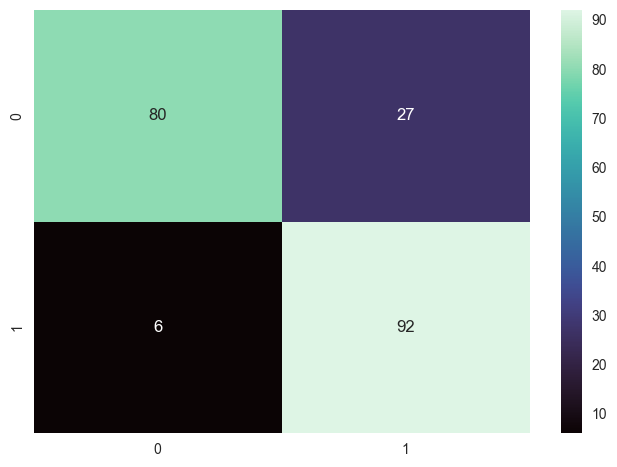

In [63]:
sns.heatmap(cm,annot= True, fmt='d', cmap='mako')

In [64]:
#Classification Report 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       107
           1       0.77      0.94      0.85        98

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.86      0.84      0.84       205



In [65]:
#Scores from Confusion Matrix 
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#print recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

#true positive rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))


#false positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.8390
Classification error : 0.1610
Precision : 0.7477
Recall or Sensitivity : 0.9302
True Positive Rate : 0.9302
False Positive Rate : 0.2269
Specificity : 0.7731


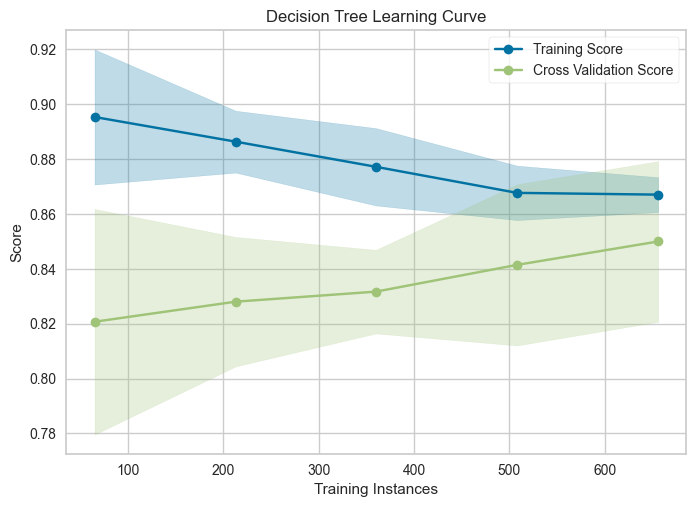

<Axes: title={'center': 'Decision Tree Learning Curve'}, xlabel='Training Instances', ylabel='Score'>

In [68]:
dtclc = LearningCurve(DTmodel, title='Decision Tree Learning Curve')
dtclc.fit(X_train, y_train)
dtclc.show()